In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\100 Days of ML\Datasets\placement.csv")

In [4]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [120]:
#Steps
# 1. Preprocess + EDA + Feature Selection
# 2. Extract input and output columns
# 3. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model/Model selection
# 7. Deploy the model

In [121]:
# Step-1

In [1]:
import matplotlib.pyplot as plt

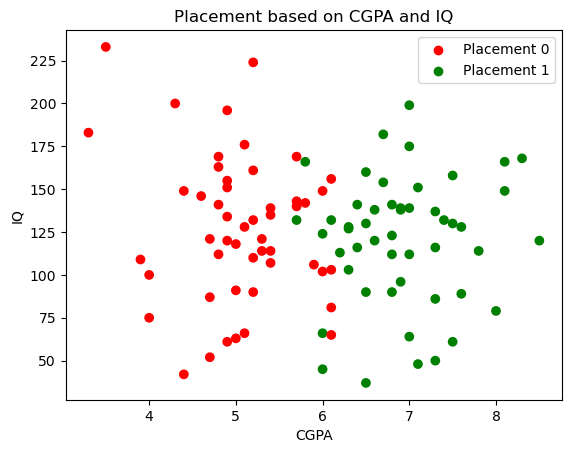

In [10]:
# Optional: define colors for clarity
colors = {0: 'red', 1: 'green'}

# Create scatter plot with mapped colors
plt.scatter(df['cgpa'], df['iq'], c=df['placement'].map(colors))

# Add legend
for label, color in colors.items():
    plt.scatter([], [], c=color, label=f'Placement {label}')
plt.legend()

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Placement based on CGPA and IQ')
plt.show()


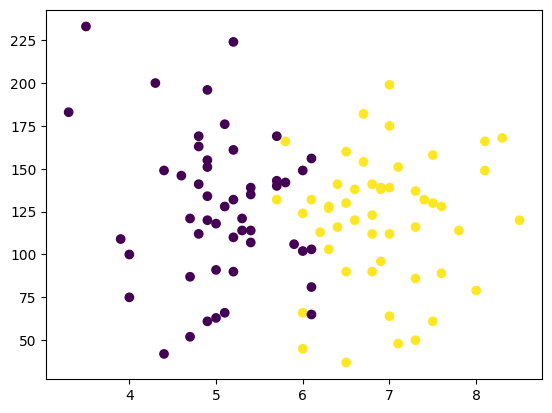

In [123]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [124]:
# Step-2

In [15]:
X = df.iloc[:,0:2] #column 2 is not included
y = df.iloc[:,-1]

In [126]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [127]:
y.shape

(100,)

In [145]:
# Step-4
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [146]:
# Step-3
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler() #creating an object of StandardScaler class 

In [148]:
X_train = scaler.fit_transform(X_train) #All values of X_train scaled down to the range of -1 to 1.

In [149]:
X_test = scaler.fit_transform(X_test)

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
clf = LogisticRegression() #creating an object Logistic Regression class

In [152]:
#Step-5 (Model training)
clf.fit(X_train,y_train)

LogisticRegression()

In [153]:
#Step-6
y_pred = clf.predict(X_test)

In [154]:
y_test

15    0
83    1
17    0
27    1
89    0
65    1
44    1
21    1
22    0
18    0
Name: placement, dtype: int64

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
accuracy_score(y_test,y_pred)

1.0

In [157]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

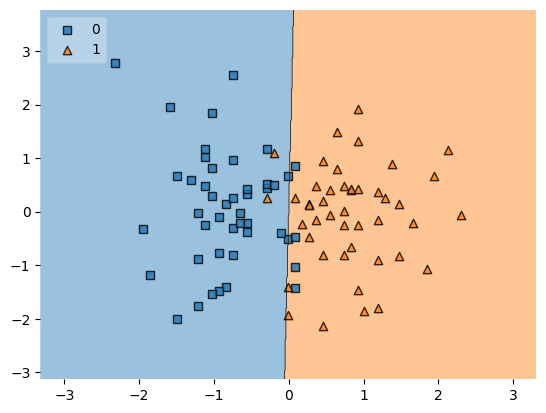

In [158]:
plot_decision_regions(X_train,y_train.values,clf=clf, legend=2) 
# Note: X_train is converted to numpy array using scaler object above. But not the y_train. Hence y_train.values!!  